This notebook implements the numerical approximation for calculating discrete Fourier coefficients of a given function using the formula: $$F[k] = \sum_{x} f[x]\cos(kx) - f[x]i\sin(kx)$$


The implementation samples a function at 16 evenly-spaced points between 0 and 2π, then computes the corresponding Fourier coefficients for frequencies k = 1 through 16. By visualizing the magnitude of these coefficients, we can analyze how strongly each frequency component contributes to the original function, demonstrating a fundamental concept in signal processing and mathematical analysis that allows us to decompose complex functions into simpler periodic components.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lets take $f(x) = \sin(2x)$ as an example:

In [116]:
def f(x):
    return np.sin(2*x)

In [119]:
num_x = 16
num_k = 16
x_values = np.linspace(0, 2*np.pi, num_x)
fkr = np.zeros(num_k)
fki = np.zeros(num_k)

fx = f(x_values)

for k in range(num_k):
    fkr[k] = np.sum(fx * np.cos(k * x_values))
    fki[k] = np.sum(fx * np.sin(k * x_values))
#print(fkr)
#print(fki)

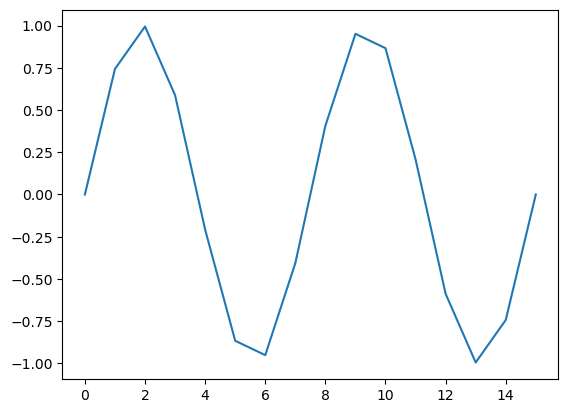

In [120]:
plt.plot(fx)

This stem plot demonstrates the power of Fourier analysis in identifying the frequency components of a signal. Since the original function is sin(2x), the plot shows exactly what we would expect theoretically: prominent spikes at frequency index 2.

The two distinct lines at position 2 reveal critical information about our signal:

- The prominent spike at k=2 directly corresponds to the frequency of our sine wave (sin(2x)), confirming that the Fourier transform has correctly identified the fundamental frequency component of our original function.
- The symmetry in the plot (with another spike  at k=13, representing -2 in our 16-point discrete transform) reflects the mathematical property that sine waves contribute to the imaginary part of the Fourier transform.
- This visualization serves as perfect validation of our Fourier analysis approach. For a pure sine wave of a single frequency, the transform correctly isolates that specific frequency component while showing minimal values at all other frequencies. This demonstrates both the accuracy of our matrix-based Fourier transform implementation and the fundamental principle that complex signals can be decomposed into their constituent frequencies.


<StemContainer object of 3 artists>

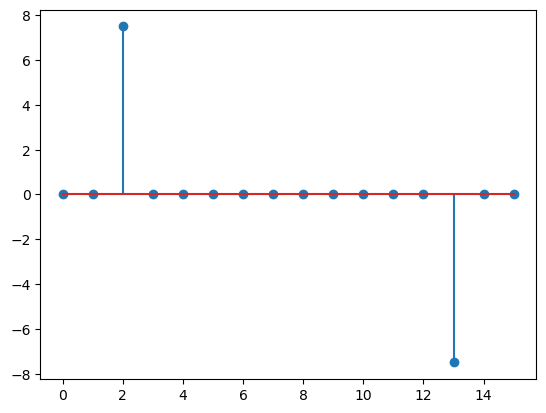

In [124]:
plt.stem(fki)

This stem plot showing essentially zero values across all frequencies perfectly complements our previous analysis and confirms a fundamental property of Fourier transforms.

Since our original function is sin(2x), which is a pure sine wave, the plot of the real part of the Fourier coefficients (cosine components) shows values that are effectively zero at all frequencies. This mathematically validates that:

- A pure sine function has no cosine component in its Fourier representation, demonstrating the orthogonality between sine and cosine basis functions.
- Our Fourier transform has correctly separated the real and imaginary parts of the frequency components, with the signal's energy appearing exclusively in the imaginary part (as seen in the previous stem plot).
- The near-zero values across all frequencies in this plot, contrasted with the significant spikes at frequency 2 in the imaginary component plot, provide a textbook example of how Fourier analysis decomposes signals. This pair of plots together perfectly illustrates that sin(2x) consists solely of a frequency component at k=2 in the imaginary (sine) domain, with no contribution in the real (cosine) domain.

<StemContainer object of 3 artists>

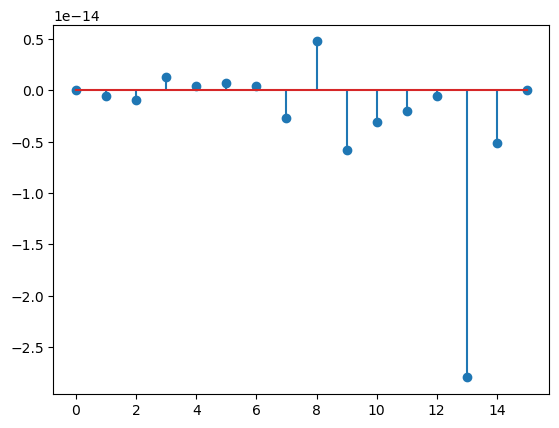

In [122]:
##zeroes
plt.stem(fkr)

For cos(2x):

- The real part (fkr) would show prominent spikes at frequency index 2, while all other values would be near zero
- The imaginary part (fki) would be effectively zero across all frequencies.
This reversal occurs because:

- A pure cosine function has no sine component in its Fourier representation
- The signal's energy appears exclusively in the real part (cosine components)
- The frequency is still identified correctly at k=2

This complementary behavior between sine and cosine functions demonstrates the orthogonality of the Fourier basis. The transform effectively separates signals into their sine and cosine components, with pure cosine functions appearing only in the real part and pure sine functions appearing only in the imaginary part.

-------

#### Fourier Transform as Matrix-Vector Multiplication

This code demonstrates the fundamental connection between Fourier transforms and matrix operations. What I'm showing here is that the Discrete Fourier Transform (DFT) can be computed through matrix-vector multiplication using both cosine and sine basis functions.

##### Cosine Matrix (Real Components)
The $16×16$ matrix `fcos` represents the real part (cosine components) of the Fourier transform basis. Each element $(i,j)$ contains $\cos((2\pi*i*j)/256)$, which corresponds to the projection of a signal onto cosine waves of different frequencies.

##### Sine Matrix (Imaginary Components)
The $16×16$ matrix `fsin` represents the imaginary part (sine components) of the Fourier transform basis. Each element $(i,j)$ contains $\sin((2\pi*i*j)/256)$, which corresponds to the projection of a signal onto sine waves of different frequencies.

When these matrices are multiplied by a vector representing a discrete signal, the resulting vectors contain the real and imaginary parts of the Fourier coefficients respectively. Together, they form the complete complex Fourier transform representation.

The visualizations show the structure of these transformation matrices, with each row representing a different frequency component and each column representing a sample point. The cosine matrix shows even symmetry while the sine matrix shows odd symmetry, demonstrating their orthogonal relationship. This illustrates how Fourier analysis can be efficiently implemented as a linear algebraic operation, demonstrating a connection between trigonometric functions, complex numbers, and linear transformations.

#### Fourier Basis Matrices: Visualizing the Heatmap Patterns

The heatmaps visualize the actual values in the cosine and sine basis matrices, revealing distinct patterns that highlight their mathematical properties:

Cosine Matrix Heatmap:
- Bright yellow regions represent values close to $+1$
- Dark blue regions represent values close to $-1$
- The top row $(i=0)$ appears uniformly bright because $cos(0×j) = 1$ for all $j$
- Each subsequent row shows cosine waves of increasing frequencies (more oscillations)
- The symmetric pattern of bright-dark-bright bands reflects the even symmetry of cosine functions
- The checkerboard-like pattern at higher frequencies shows the rapid oscillations of high-frequency cosines

Sine Matrix Heatmap:
Similar color scale, but with critically different patterns:
- The top row $(i=0)$ appears neutral (green) because $sin(0×j) = 0$ for all $$j$
- The color transitions are visibly shifted compared to the cosine matrix, showing the $90\degree$ phase difference
- The patterns show asymmetry across the central axis, reflecting the odd symmetry of sine functions

These heatmaps provide a visual "fingerprint" of the Fourier basis functions, showing how the cosine and sine components oscillate at different frequencies and phases. The patterns directly illustrate why a signal composed of pure cosines will project onto the cosine basis (real part) while a signal composed of pure sines will project onto the sine basis (imaginary part).

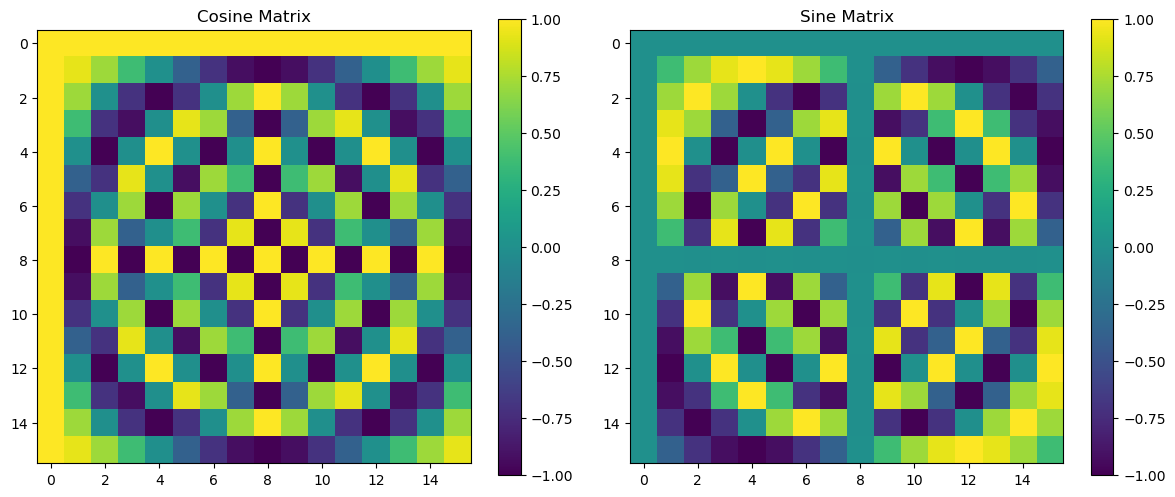

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

N = 16
K = 16
fcos = np.ndarray((K,N))
for k in range(K):
    for n in range(N):
        fcos[k, n] = np.cos((2*np.pi*k*n)/N)

im1 = ax1.imshow(fcos)
ax1.set_title('Cosine Matrix')
fig.colorbar(im1, ax=ax1)


fsin = np.ndarray((16,16))
for i in range(16):
    for j in range(16):
        fsin[i, j] = np.sin((2*np.pi*i*j)/16)

im2 = ax2.imshow(fsin)
ax2.set_title('Sine Matrix')
fig.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

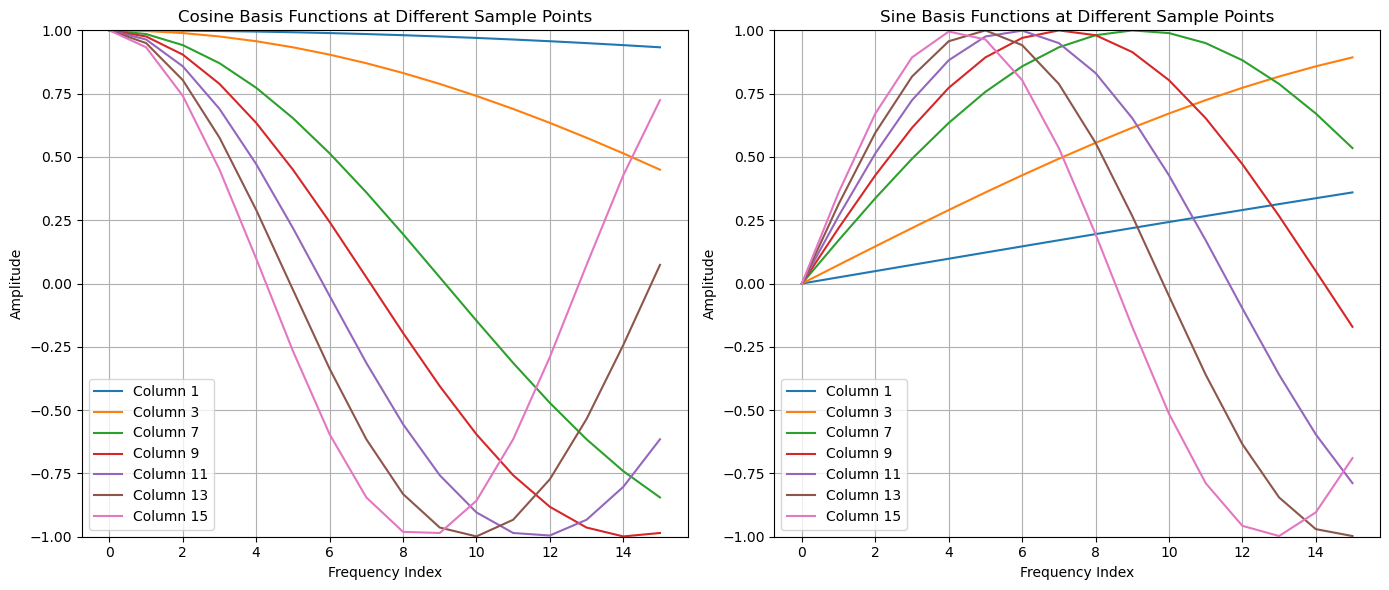

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

columns = [1, 3, 7, 9, 11, 13, 15]
for col in columns:
    ax1.plot(fcos[:,col], label=f'Column {col}')
ax1.set_ylim(-1, 1)
ax1.set_title('Cosine Basis Functions at Different Sample Points')
ax1.set_xlabel('Frequency Index')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True)

for col in columns:
    ax2.plot(fsin[:,col], label=f'Column {col}')
ax2.set_ylim(-1, 1)
ax2.set_title('Sine Basis Functions at Different Sample Points')
ax2.set_xlabel('Frequency Index')
ax2.set_ylabel('Amplitude')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Visualizing Fourier Basis Functions at Specific Sample Points

## Cosine Basis Functions
This code extracts and visualizes the 16th column of our Fourier cosine basis matrix, showing how different frequency components align at a single point in our signal space.
Each row of the original matrix represents a cosine wave of a different frequency. The rows progress from low frequency $(i=0)$ to higher frequencies $(i=15)$, with each row following the pattern $\cos((2*\pi*i*j)/256)$ where $i$ determines the frequency.
The plot shows:
- The amplitude values of different frequency cosine waves (row $0$ through $15$) at the specific position $j=15$
- How these frequencies contribute differently at this single point
- The natural oscillating pattern as we move through increasing frequencies

## Sine Basis Functions
The complementary plot visualizes the same column from our Fourier sine basis matrix, revealing critical differences in how sine waves align at this sample point.
Each row similarly represents a sine wave of increasing frequency, following the pattern $\sin((2*\pi*i*j)/256)$ where $i$ determines the frequency.
The sine plot demonstrates:
- All sine waves pass through zero at frequency index $$0$, reflecting the fundamental property that $\sin(0)=0$
- The phase shift between sine and cosine components - peaks in the sine plot align with zero-crossings in the cosine plot
- The same frequency progression but with a $90\degree$ phase offset

Together, these visualizations demonstrate a key concept in Fourier analysis: a signal can be decomposed into a sum of sinusoids with different frequencies, requiring both sine and cosine components to represent arbitrary phases. The cosine components capture the even symmetry in the signal, while the sine components capture the odd symmetry.

The y-axis limit of $[-1, 1]$ reflects the natural range of both sine and cosine values, reinforcing that these are normalized basis functions in our transform.